In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import array_to_latex, plot_state_qsphere, plot_bloch_multivector
from qiskit.extensions import Initialize

In [2]:
def add_walk_step(circuit):
    # coin flip
    circuit.h(0)
    
    # incrementation
    circuit.ccx(0, 1, 2)
    circuit.cx(0, 1)
    
    # decrementation
    circuit.x(0)
    circuit.x(1)
    circuit.ccx(0, 1, 2)
    circuit.x(1)
    circuit.cx(0, 1)
    circuit.x(0)
    
    circuit.barrier()
    
def draw_state(circuit, option='latex'):
    state = Statevector.from_int(0, 2 ** 3)
    state = state.evolve(circuit)
    
    # return state.draw('qsphere')
    return state.draw(option)

# 1 step

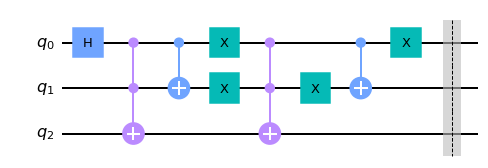

In [3]:
circuit = QuantumCircuit(3)
add_walk_step(circuit)
circuit.draw('mpl')

In [4]:
draw_state(circuit)

<IPython.core.display.Latex object>

# 2 steps

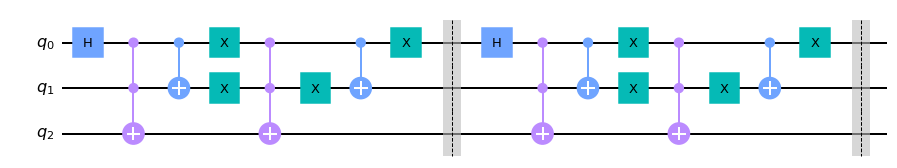

In [5]:
circuit = QuantumCircuit(3)
add_walk_step(circuit)
add_walk_step(circuit)
circuit.draw('mpl')

In [6]:
draw_state(circuit, 'latex')

<IPython.core.display.Latex object>

# 3 steps

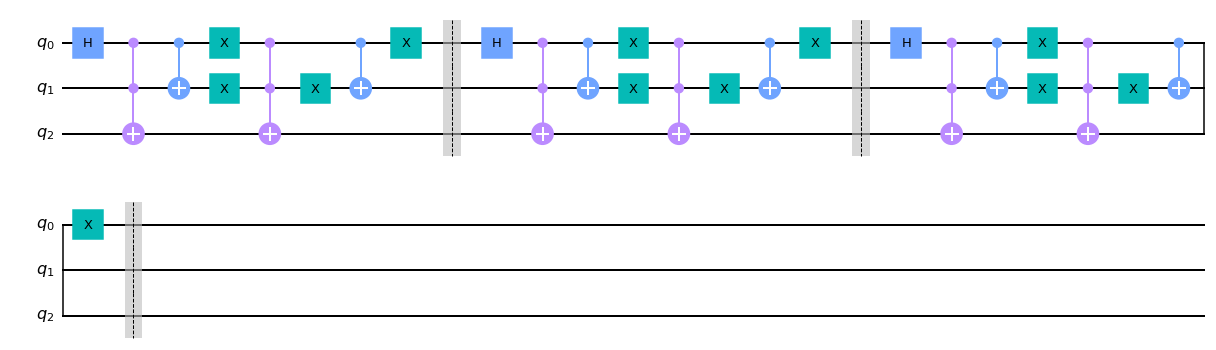

In [7]:
circuit = QuantumCircuit(3)
add_walk_step(circuit)
add_walk_step(circuit)
add_walk_step(circuit)
circuit.draw('mpl')

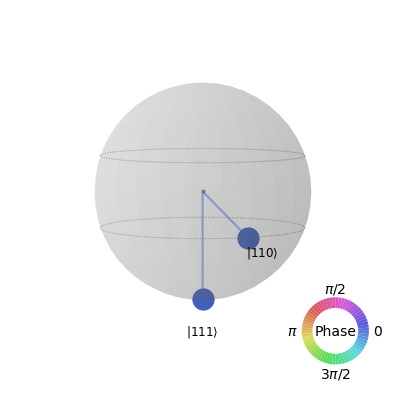

In [8]:
draw_state(circuit, 'qsphere')

# Quantum computer

In [9]:
TOKEN = ''

from qiskit import transpile
from qiskit.providers.aer import QasmSimulator

from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

from qiskit.visualization import plot_histogram

In [10]:
IBMQ.save_account(TOKEN)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

configrc.store_credentials:WARNING:2022-04-11 14:51:24,286: Credentials already present. Set overwrite=True to overwrite.


## 1 step

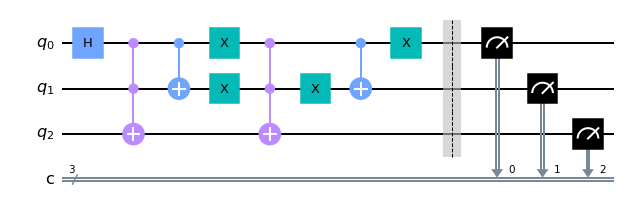

In [11]:
circuit = QuantumCircuit(3, 3)
add_walk_step(circuit)
circuit.measure(range(3), range(3))
circuit.draw('mpl')

### Simulation

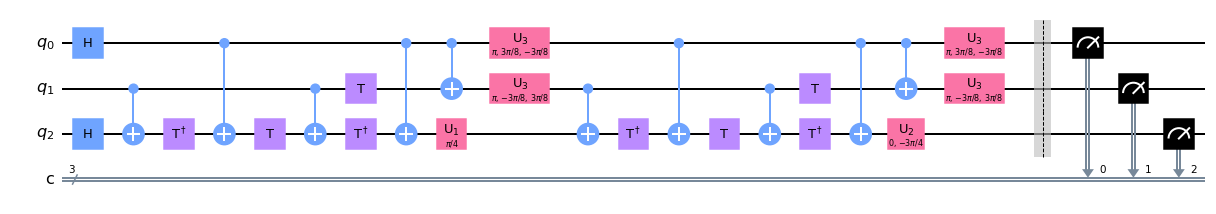

In [12]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)
circuit_compiled.draw('mpl')

In [13]:
job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'011': 536, '110': 488}


### Real device

least busy backend:  ibmq_lima


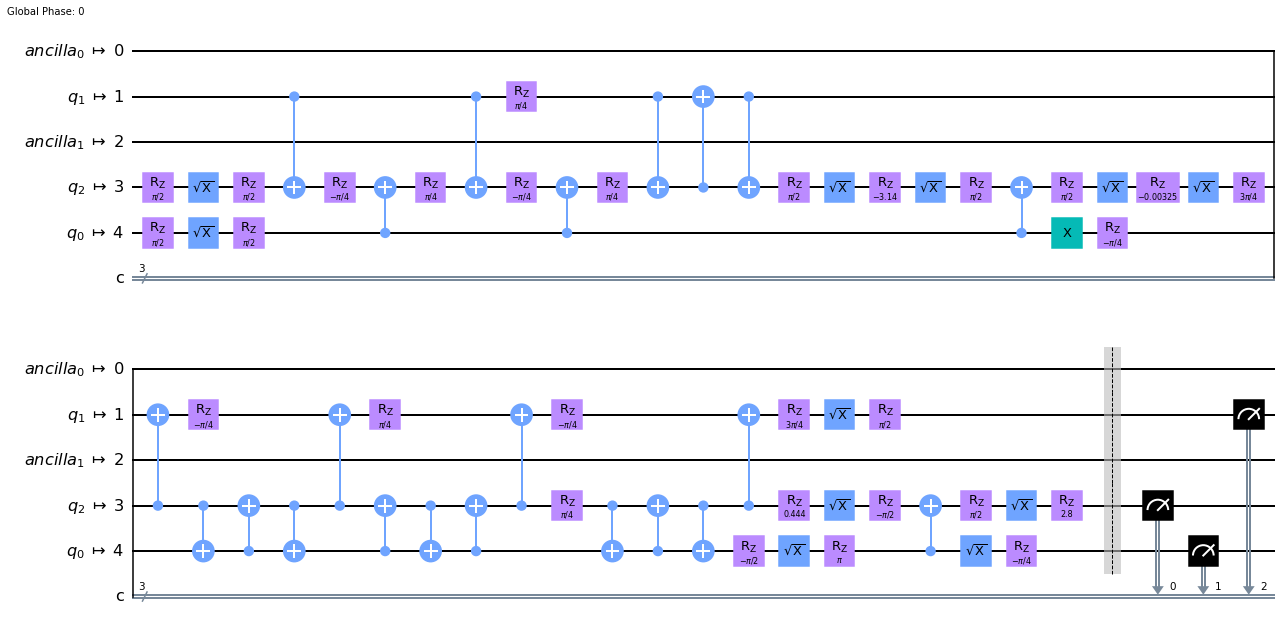

In [14]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)
circuit_compiled.draw('mpl')

In [15]:
job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

Job Status: job has successfully run
{'000': 76, '001': 101, '010': 49, '011': 258, '100': 61, '101': 53, '110': 290, '111': 136}


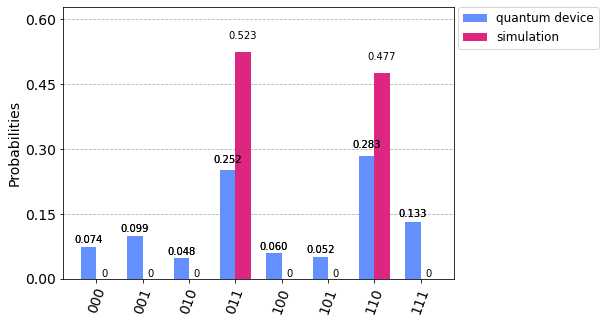

In [16]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])

## 2 steps

In [17]:
circuit = QuantumCircuit(3, 3)
add_walk_step(circuit)
add_walk_step(circuit)
circuit.measure(range(3), range(3))

In [18]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'001': 276, '100': 244, '000': 251, '101': 253}


In [19]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

least busy backend:  ibmq_belem
Job Status: job has successfully run
{'000': 149, '001': 210, '010': 92, '011': 77, '100': 159, '101': 184, '110': 88, '111': 65}


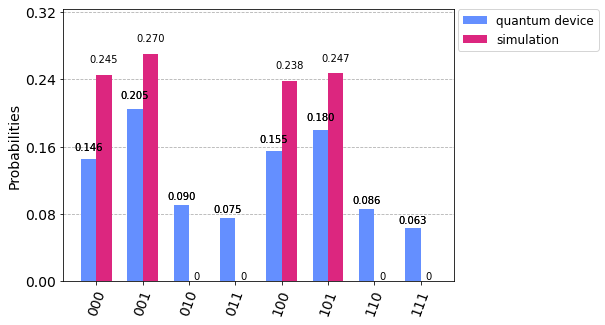

In [20]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])

## 3 steps

In [21]:
circuit = QuantumCircuit(3, 3)
add_walk_step(circuit)
add_walk_step(circuit)
add_walk_step(circuit)
circuit.measure(range(3), range(3))

In [22]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'111': 526, '110': 498}


In [23]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

least busy backend:  ibmq_lima
Job Status: job has successfully run
{'000': 76, '001': 82, '010': 154, '011': 151, '100': 87, '101': 79, '110': 202, '111': 193}


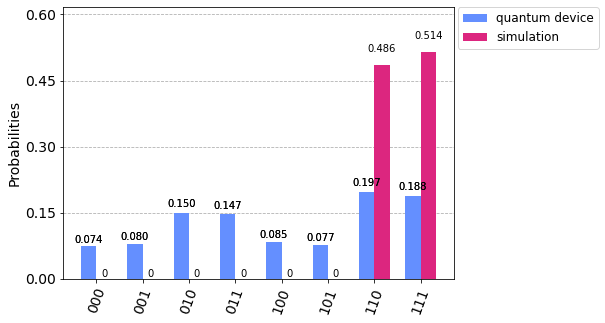

In [24]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])